<a href="https://colab.research.google.com/github/FaisalAhmedBijoy/Tensorflow-for-Deep-Learning-Udacity/blob/main/Image_Classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
import glob

In [2]:
print('Current working directory: ',os.getcwd())

Current working directory:  /content


## Setup Dataset Path 

In [3]:
'''
building_house=glob.glob('dataset_building/building_house/*.*')
mosque=glob.glob('dataset_building/mosque/*.*')
temple=glob.glob('dataset_building/temple/*.*')
tinshed=glob.glob('dataset_building/tinshed/*.*')
sky_building=glob.glob('dataset_building/sky_building/*.*')
mud_house=glob.glob('dataset_building/mud_house/*.*')
'''


"\nbuilding_house=glob.glob('dataset_building/building_house/*.*')\nmosque=glob.glob('dataset_building/mosque/*.*')\ntemple=glob.glob('dataset_building/temple/*.*')\ntinshed=glob.glob('dataset_building/tinshed/*.*')\nsky_building=glob.glob('dataset_building/sky_building/*.*')\nmud_house=glob.glob('dataset_building/mud_house/*.*')\n"

In [4]:
''' 
print('Building house data : ',len(building_house))
print('Mosque data: ',len(mosque))
print('Temple data: ',len(temple))
print('Tinshed data: ',len(tinshed))
print('Sky building data: ',len(sky_building))
print('Mud house data: ',len(mud_house))
'''


" \nprint('Building house data : ',len(building_house))\nprint('Mosque data: ',len(mosque))\nprint('Temple data: ',len(temple))\nprint('Tinshed data: ',len(tinshed))\nprint('Sky building data: ',len(sky_building))\nprint('Mud house data: ',len(mud_house))\n"

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
train_path='/content/drive/My Drive/CSE 4000 Thesis/Dataset1500/train'
test_path='/content/drive/My Drive/CSE 4000 Thesis/Dataset1500/test'
print(os.listdir(train_path))
print(os.listdir(test_path))

['building_house', 'mosque', 'temple', 'tinshed', 'mud_house', 'sky_building']
['mud_house', 'building_house', 'mosque', 'sky_building', 'temple', 'tinshed']


## Dataset Preprocssing using ImageDataGenerator

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
WIDTH=224
HEIGHT=224

In [9]:
train_generator = ImageDataGenerator(rescale=1./255,
                                    horizontal_flip=True,
                                    #shear_range=0.1 ,
                                    #zoom_range=0.1,
                                    #rotation_range=10,
                                    #height_shift_range=0.1,
                                    fill_mode='nearest',
                                    validation_split=0.2)
                                     
train_dataset = train_generator.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                 target_size=(WIDTH, HEIGHT),
                                                 class_mode='categorical',
                                                 subset='training')

validation_dataset = train_generator.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                 target_size=(WIDTH, HEIGHT), 
                                                 class_mode='categorical',
                                                 subset='validation')

Found 960 images belonging to 6 classes.
Found 240 images belonging to 6 classes.


In [10]:
test_generator=ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory(batch_size=32,
                                                 directory=test_path,
                                                 shuffle=True,
                                                 target_size=(WIDTH, HEIGHT), 
                                                 class_mode='categorical')

Found 300 images belonging to 6 classes.


In [11]:
train_dataset.class_indices

{'building_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'sky_building': 3,
 'temple': 4,
 'tinshed': 5}

In [12]:
validation_dataset.class_indices

{'building_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'sky_building': 3,
 'temple': 4,
 'tinshed': 5}

In [13]:
total_class=len(train_dataset.class_indices)
print('Number of classes in dataset: ',total_class)

Number of classes in dataset:  6


## Plot some random image
- class 0: building house
- class 1: mosque
- class 2: mud house
- class 3: sky building
- class 4: temple
- class 5: tinshed

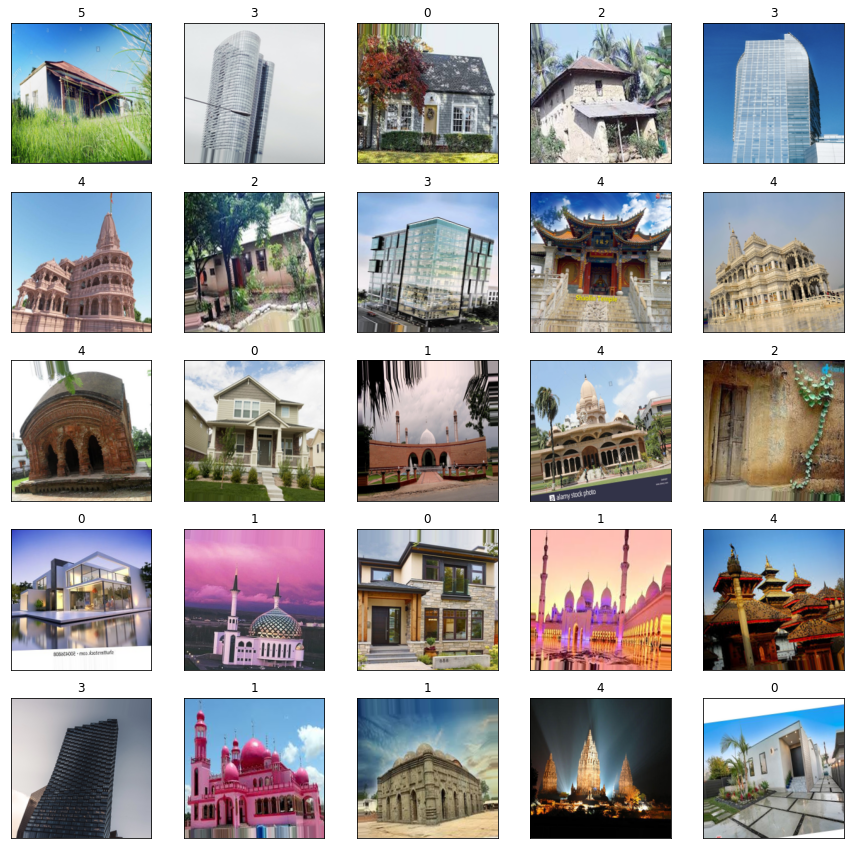

In [14]:
x,y=train_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

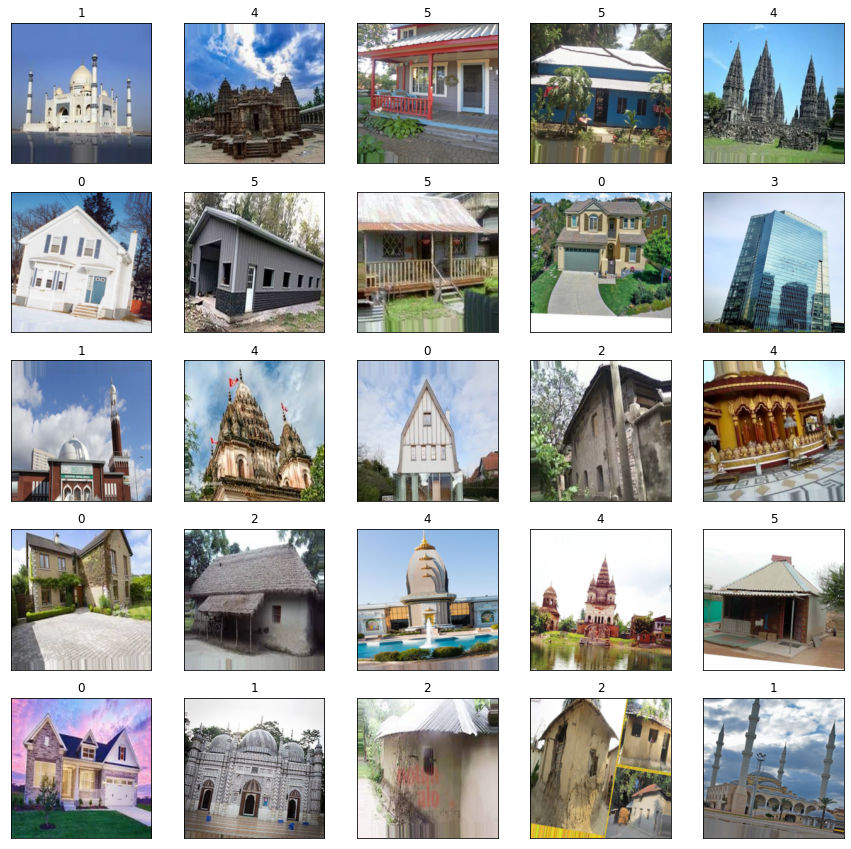

In [15]:
x,y=validation_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

## Define Convolutional Neural Network Architecture

In [16]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential

In [17]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(total_class,activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 54, 54, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       7

## Compile CNN Model

In [23]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

## Trained  CNN Model

In [24]:
epochs=200
batch_size=32
trainset_length=len(train_dataset.labels)
validation_length=len(validation_dataset.labels)
steps_per_epoch=(trainset_length//batch_size)
validation_steps=(validation_length//batch_size)
print(trainset_length)
print(validation_length)
print(steps_per_epoch)
print(validation_steps)

960
240
30
7


In [25]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/building.model.best.hdf5', verbose=1 ,save_best_only=True)

In [26]:
history = model.fit(train_dataset,
                    steps_per_epoch = steps_per_epoch,
                    epochs=epochs,
                    validation_data=validation_dataset,
                    validation_steps=validation_steps,callbacks=[checkpointer])

27/30 [==========================>...] - ETA: 1s - loss: 0.2333 - accuracy: 0.9661

KeyboardInterrupt: ignored

In [ ]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy graph')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [ ]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss training graph')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

## Testing the model

In [ ]:
test_loss,test_accuracy=model.evaluate(validation_dataset)

In [ ]:
print('Accuracy of the model is : ',test_accuracy*100)

## Save Model h5 format
This file includes
- Model architecture
- Model weight values during training
- model training config 
- optimizer 

In [ ]:
import time
t = time.time()
export_path_keras = "/content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/CNN_model{}_time_{}.h5".format(test_accuracy,int(t))
print(export_path_keras)
model.save(export_path_keras)

## Reload the model h5 format

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
reload_model=load_model(export_path_keras)
reload_model.summary()

## Check Random Image

In [ ]:
image_batch,label_batch=next(iter(validation_dataset))

In [ ]:
label_batch[:5]

## Classification report 

In [ ]:
predicted_result=model.predict(validation_dataset)
predicted_result[:5]

In [ ]:
predicted_value=np.argmax(model.predict(validation_dataset),axis=-1)
predicted_value

In [ ]:
validation_value=validation_dataset.classes
validation_value

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy score: ',accuracy_score(validation_dataset.classes,predicted_value))

In [ ]:
from sklearn.metrics import classification_report
print('classification report \n',classification_report(validation_dataset.classes,predicted_value))

## Another approach to calculate the classification report

In [ ]:
predicted_array=model.predict(validation_dataset)
predicted_array